
# Project: Investigation of No-Show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Based on the different characteristics of the patient provided by the dataset, we analyzed which factor are associated with the no-show to predict if a patient will show up for their scheduled appointment, including: age, waitting days, gender, sms received, sponsorship and health condition.

Questions to be investigated:
<ul>
<li>Relationship between No-show and waitting time and age</li>
<li>Relationship between No-show and appointment day of week</li>
<li>Relationship between No-show and gender/age</li>
<li>Relationship between No-show and health condition</li>
<li>Relationship between No-show and having SMS_Received/Sponsorship</li>
</ul>


## Importing Data

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Wrangling

In [222]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [223]:
#find out the numbers of row and column
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 110527
Columns: 14


In [224]:
#check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [226]:
#rename columns with typo mistake and check the first 5 lines of the data
df.rename(columns = {'AppointmentID': 'AppointmentId',
                    'Hipertension': 'Hypertension',
                    'Handcap': 'Handicap',
                    'No-show': 'NoShow'}, inplace = True)
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [145]:
#Change appointmentday and scheduleday to datatime
#Calcualte the waitting days and cut the timeset
df.iloc[:,3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')
df["WaitingDays"] = df["AppointmentDay"] - df["ScheduledDay"]
df['WaitingDays']= df['WaitingDays'].apply(lambda x: x.days)
df = df.query('WaitingDays >= -1')

time_labels = ['immediately','OneDay','OneWeek','TwoWeek','OneMonth']
time_cut = [-2,0,6,13,29,999]
df['WaitingDays'] = pd.cut(df['WaitingDays'], time_cut, labels=time_labels)

## Exploratory Data Analysis

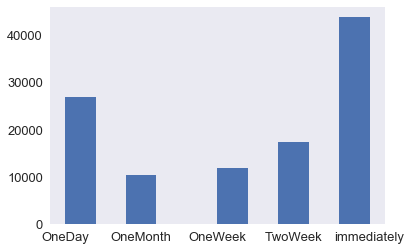

In [146]:
#visualize the waittingdays
plt.hist(df.WaitingDays);

In [147]:
#data cleaning to make sure age are equal or larger than 0 years old
df = df.query('Age >=0')

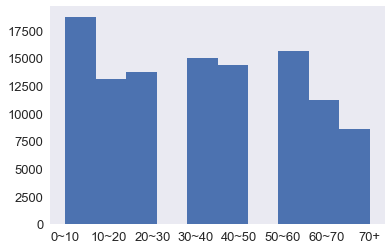

In [148]:
#group age to age set
age_labels = ['0~10','10~20','20~30','30~40','40~50','50~60','60~70', '70+']
age_cut = [-1,10,20,30,40,50,60,70,999]
df['Age_Group'] = pd.cut(df['Age'], age_cut, labels=age_labels)
plt.hist(df.Age_Group);

### Probability of different waitingdays and age groups

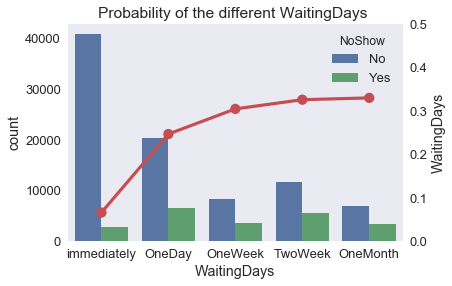

In [154]:
ax1 = sns.countplot(x='WaitingDays', data=df, hue='NoShow')

plt.title('Probability of the different WaitingDays ');

probability_time = df.query('NoShow == "Yes"')['WaitingDays'].value_counts(sort=False)/df['WaitingDays'].value_counts(sort=False)
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x=probability_time.index, y=probability_time, color='r', ax=ax2)


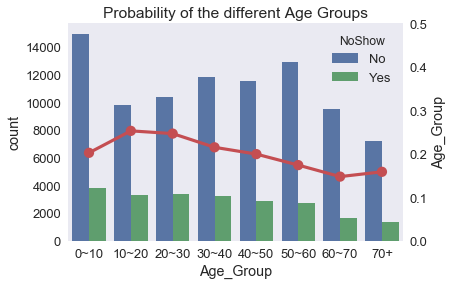

In [155]:
ax1 = sns.countplot(x='Age_Group', data=df, hue='NoShow')

plt.title('Probability of the different Age Groups');

probability_age = df.query('NoShow == "Yes"')['Age_Group'].value_counts(sort=False)/df['Age_Group'].value_counts(sort=False)


ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x=probability_age.index, y=probability_age, color='r', ax=ax2)



### Probability of Different Day of the Week

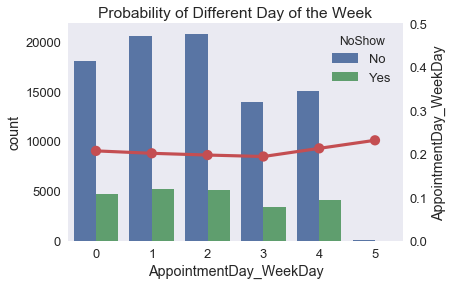

In [174]:
df["AppointmentDay_WeekDay"] = df["AppointmentDay"].dt.weekday

ax1 = sns.countplot(x='AppointmentDay_WeekDay', data=df, hue='NoShow')

plt.title('Probability of Different Day of the Week');

probability_Weekday = df.query('NoShow == "Yes"')['AppointmentDay_WeekDay'].value_counts(sort=False)/df['AppointmentDay_WeekDay'].value_counts(sort=False)


ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x=probability_Weekday.index, y=probability_Weekday, color='r', ax=ax2)


### Relationship Between No-Show and Gender/Age

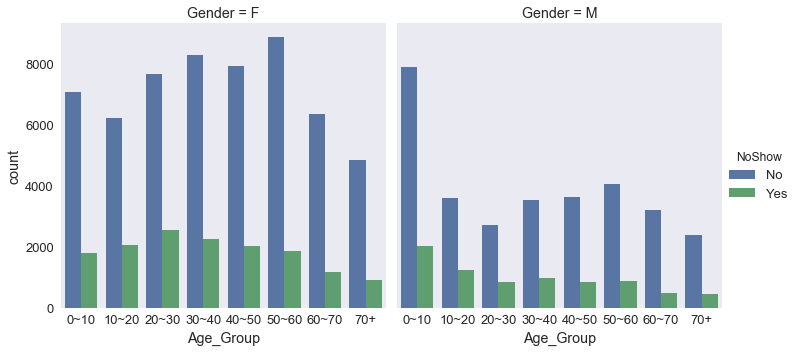

In [188]:
sns.factorplot(x='Age_Group',hue='NoShow', data=df, kind='count',col='Gender',size=5);

### No-Show vs. Show-up Ratio

In [169]:
no_show = df['NoShow'].value_counts()

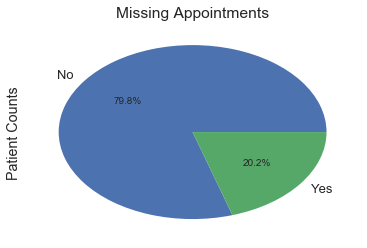

In [228]:
no_show.plot(kind = "pie",autopct='%1.1f%%', title = "Missing Appointments")

plt.ylabel("Patient Counts");


### No-Show vs. Show-up Ratio by Gender

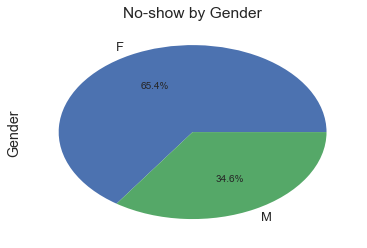

In [178]:
Not_Showing['Gender'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', title = "No-show by Gender")

### Probability of showing up with correlation of Age and Diseases

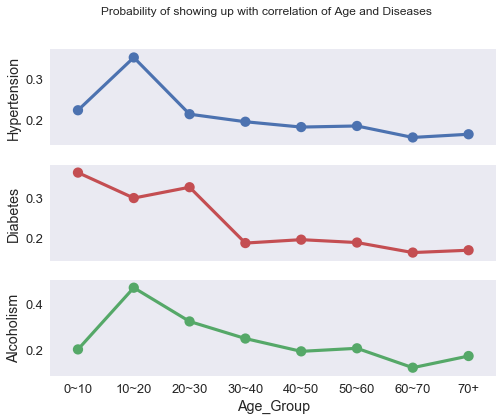

In [204]:
probability_AgeGroup = df.query('NoShow == "Yes"').groupby('Age_Group').sum()/df.groupby('Age_Group').sum()

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
f.suptitle('Probability of showing up with correlation of Age and Diseases')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.Hypertension, ax=ax1)
ax1.set_xlabel('')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.Diabetes,color='r',ax=ax2)
ax2.set_xlabel('')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.Alcoholism,color='g',ax=ax3)


### Probability of showing up with correlation of Age and Other Factors

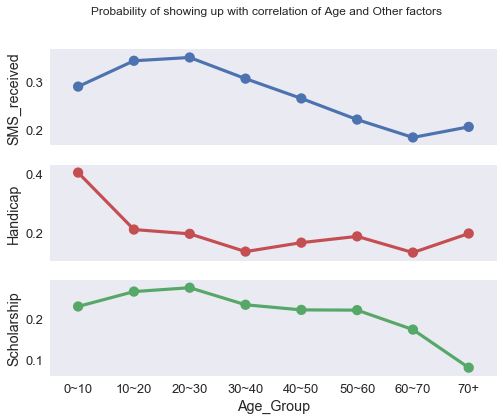

In [206]:
probability_AgeGroup = df.query('NoShow == "Yes"').groupby('Age_Group').sum()/df.groupby('Age_Group').sum()

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
f.suptitle('Probability of showing up with correlation of Age and Other factors')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.SMS_received, ax=ax1)
ax1.set_xlabel('')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.Handicap,color='r',ax=ax2)
ax2.set_xlabel('')

sns.pointplot(x=probability_AgeGroup.index,y=probability_AgeGroup.Scholarship,color='g',ax=ax3)



### Can SMS Reminder help improving the show-up rate?

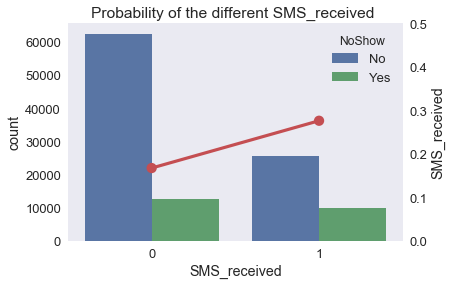

In [216]:
ax1 = sns.countplot(x='SMS_received', data=df, hue='NoShow')

plt.title('Probability of the different SMS_received ');

probability_SMS = df.query('NoShow == "Yes"')['SMS_received'].value_counts(sort=False)/df['SMS_received'].value_counts(sort=False)
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x=probability_SMS.index, y=probability_SMS, color='r', ax=ax2)



### Can Sponsorshop help improving the show-up rate?

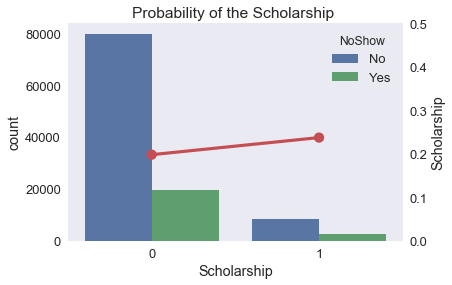

In [218]:
ax1 = sns.countplot(x='Scholarship', data=df, hue='NoShow')

plt.title('Probability of the Scholarship ');

probability_Scholarship = df.query('NoShow == "Yes"')['Scholarship'].value_counts(sort=False)/df['Scholarship'].value_counts(sort=False)
ax2 = ax1.twinx()
ax2.set_ylim([0, 0.5])
sns.pointplot(x=probability_Scholarship.index, y=probability_Scholarship, color='r', ax=ax2)




## Limitation
>This report analyzed the indicators of mising an appointment based on the no-show rate. However, we don't know if the no-show rate is significant based on the data collected. We can use p-value to see if the indicator is strong enough. Also, there might be correlation of between these independent variables.

<a id='conclusions'></a>
## Conclusions

>Based on the data collected, the no-show rate is around 20%. When divided it by gender, the no-show rate of female is almost 2 times of that of the opposite group, with 65% and 35% respectively.

>The waiting days is critical to the appointment show up. The no-show rate increase as the waiting days become longer

>patient within 10-20 years old have the highest no-show rate, the number experienced a consistent decrease along with the aging. patient over 60 years old has the lowest no-show rate

>There are more appointments on Tuesday and Wednesday, but the no-show rate are similar across the whole week(Monday - Friday)

>Age 20-30 female has the highest appointment no-show, while male of 0-10 years old has the highest no-show

>The no-show for patient over 60 years old is the lowest for both male and female.

>Alcoholist between age 10-20 has the highest no-show rate
Patient aged under 30 with diabetes experienced the highest no-show. 

>Alcoholism between age 10-20 has the highest no-show rate

>Patient between age 10-20 with hyerthension has much higher no-show when compared with other age group.

>The data shows SMS reminder doesn’t seem to help improving the show-up rate. People receiving SMS reminder actually has higher no-show rate with age 10-30 being the main group missing the appointment.

>Majority of the patient doesn’t have sponsorship, it seems like it is not the key factor and doesn’t really affect the show-up rate.

reference: https://www.jianshu.com/p/5fcaaa3e1bd6